In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!dir /b datas\dqd

g345dqd_10kn2017-9-5(18-20-25).txt
g345dqd_12kn2017-9-5(18-24-22).txt
g345dqd_15kn2017-9-5(18-38-35).txt
g345dqd_7kn022017-9-5(17-27-47).txt
g345dqd_7kn2017-9-5(16-37-31).txt


In [3]:
cols = ['时间', '振次', '轴位移', '力', '应力', '变形', '侧位移', '围压', '孔压', '反压', '体变', '小体变']
drop_cols = ['侧位移', '体变', '小体变', '应力']
df_15kn = pd.read_table('datas/dqd/g345dqd_15kn2017-9-5(18-38-35).txt')
df_15kn.columns = cols
df_15kn.drop(drop_cols, 1, inplace=True) #remove cols that not needed
df_15kn.dropna(inplace=True)
df_15kn['N'] = [0.02*n for n in range(df_15kn.shape[0])]
df_15kn['d1'] = df_15kn['轴位移']-df_15kn['轴位移'][0]
df_15kn['pp'] = df_15kn['孔压']-df_15kn['孔压'][0]
df_15kn.to_csv('datas/15kn.csv', index=False)

In [4]:
df_12kn = pd.read_table('datas/dqd/g345dqd_12kn2017-9-5(18-24-22).txt')
df_12kn.columns = cols
df_12kn.drop(drop_cols, 1, inplace=True) #remove cols that not needed
df_12kn.dropna(inplace=True)
df_12kn['N'] = [0.02*n for n in range(df_12kn.shape[0])]
df_12kn['d1'] = df_12kn['轴位移']-df_12kn['轴位移'][0]
df_12kn['pp'] = df_12kn['孔压']-df_12kn['孔压'][0]
df_12kn.to_csv('datas/12kn.csv', index=False)

In [5]:
df_10kn = pd.read_table('datas/dqd/g345dqd_10kn2017-9-5(18-20-25).txt')
df_10kn.columns = cols
df_10kn.drop(drop_cols, 1, inplace=True) #remove cols that not needed
df_10kn.dropna(inplace=True)
df_10kn['N'] = [0.02*n for n in range(df_10kn.shape[0])]
df_10kn['d1'] = df_10kn['轴位移']-df_10kn['轴位移'][0]
df_10kn['pp'] = df_10kn['孔压']-df_10kn['孔压'][0]
df_10kn.to_csv('datas/10kn.csv', index=False)

In [6]:
df1_7kn = pd.read_table('datas/dqd/g345dqd_7kn2017-9-5(16-37-31).txt')
df2_7kn = pd.read_table('datas/dqd/g345dqd_7kn022017-9-5(17-27-47).txt')
df_7kn = pd.concat([df1_7kn,df2_7kn], ignore_index=True)
df_7kn.columns = cols
df_7kn.drop(drop_cols, 1, inplace=True) #remove cols that not needed
df_7kn.dropna(inplace=True)
df_7kn['N'] = [0.02*n for n in range(df_7kn.shape[0])]
df_7kn['d1'] = df_7kn['轴位移']-df_7kn['轴位移'][0]
df_7kn['pp'] = df_7kn['孔压']-df_7kn['孔压'][0]
df_7kn.to_csv('datas/7kn.csv', index=False)


In [7]:
def plotd1(df, title):
    plt.plot(df['N'],df['d1']/6)
    plt.xlabel('N', fontsize=18)
    plt.ylabel(r'$\varepsilon_z$ / %', fontsize=18)
    plt.title('g345 {0}kn'.format(title))


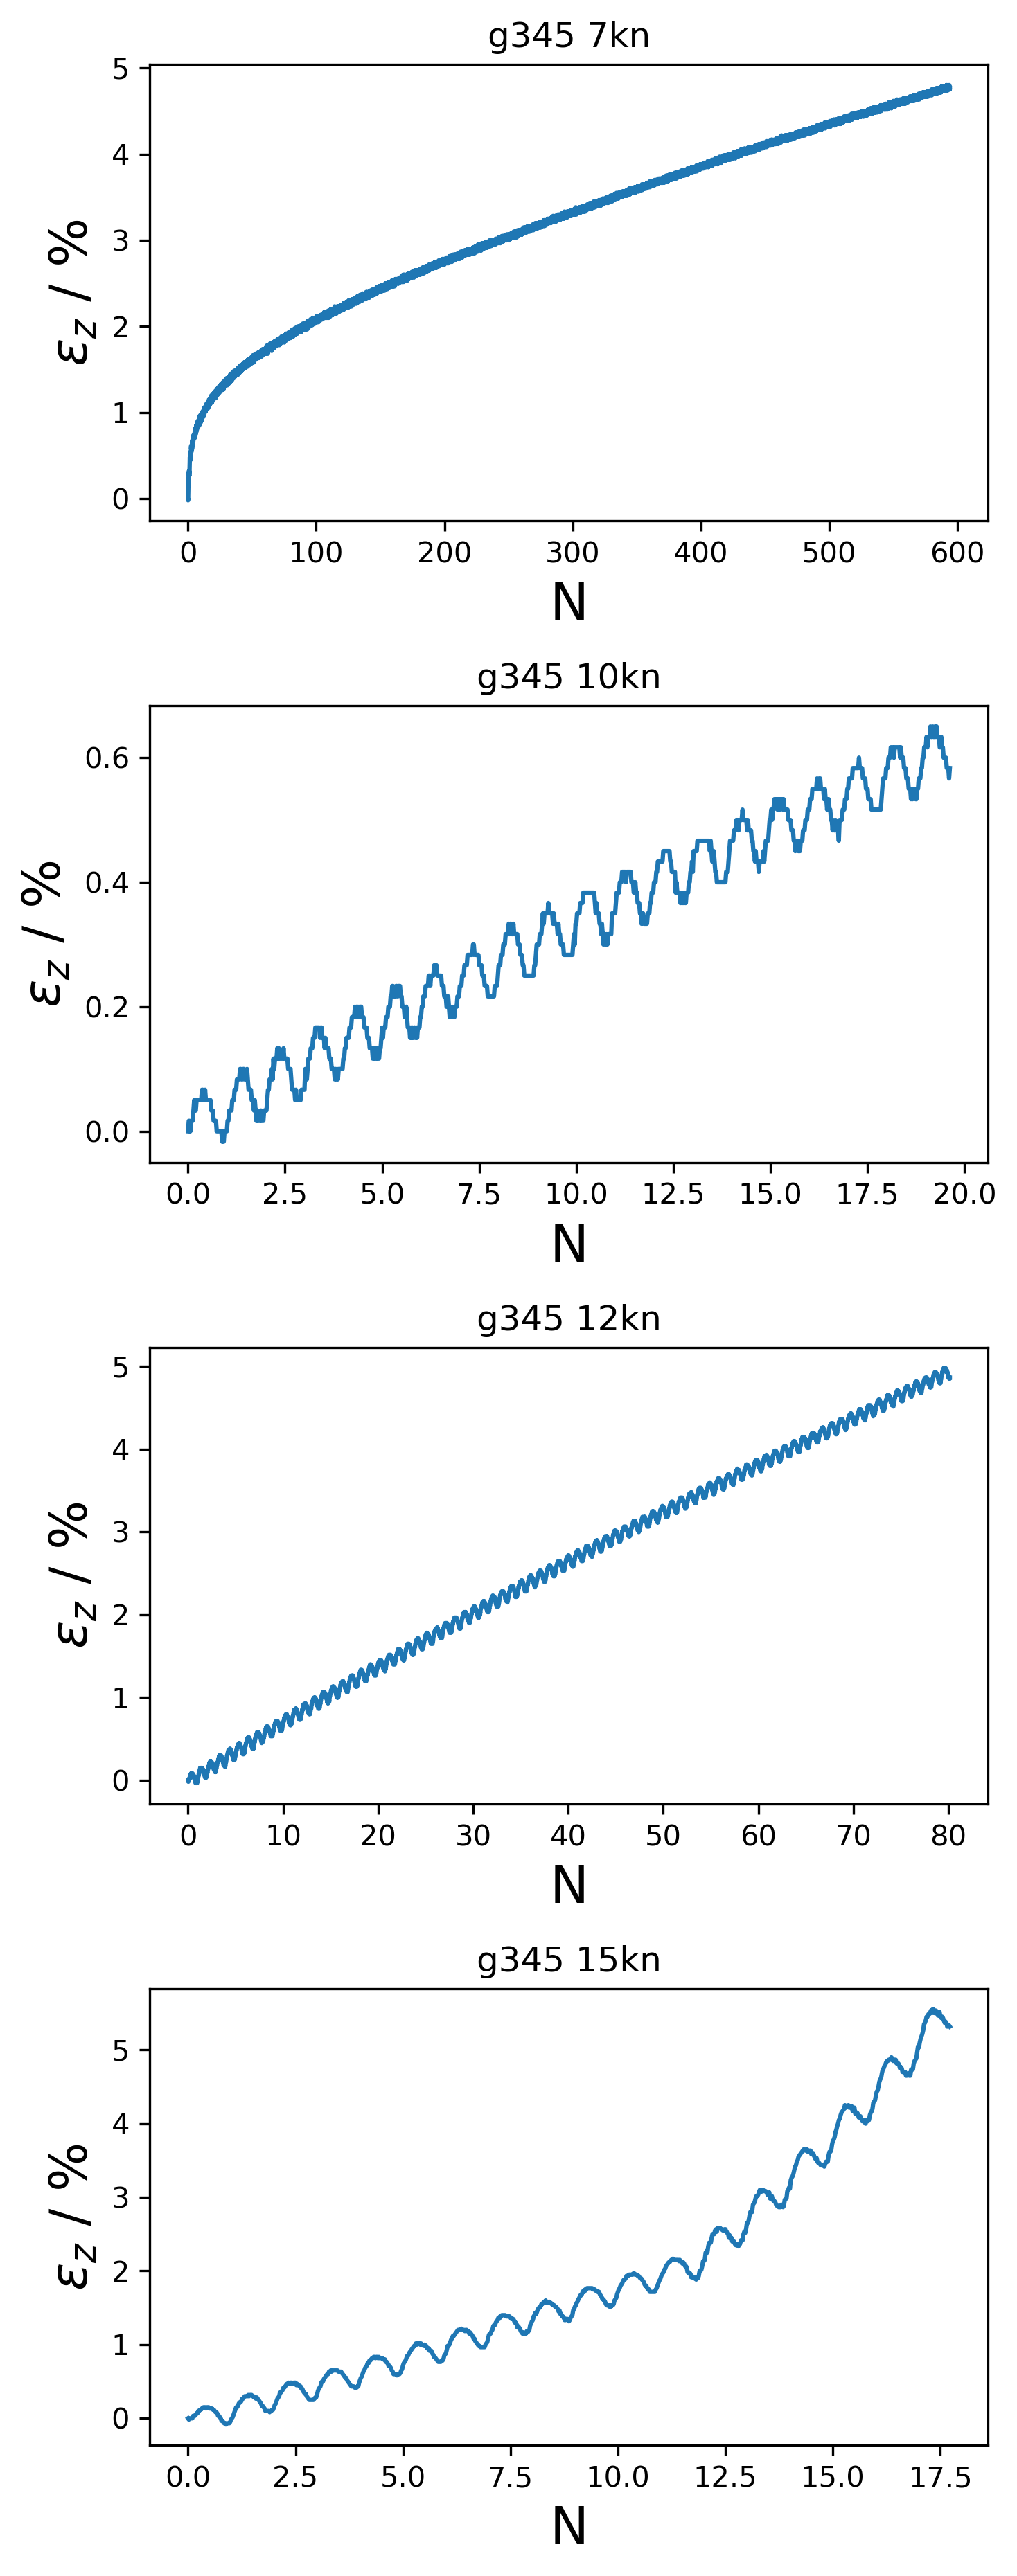

In [9]:
plt.figure(figsize=(5,12.5), dpi=300)
plt.subplot(4, 1, 1)
plotd1(df_7kn, 7)
plt.subplot(4, 1, 2)
plotd1(df_10kn, 10)
plt.subplot(4, 1, 3)
plotd1(df_12kn, 12)
plt.subplot(4, 1, 4)
plotd1(df_15kn, 15)
plt.tight_layout()
plt.savefig('g345d1.png')

In [10]:
def plotu(df, title):
    plt.plot(df['振次'],df['pp'])
    plt.xlabel('N', fontsize=18)
    plt.ylabel('u / kPa', fontsize=18)
    plt.title('g345 {0}kn'.format(title))

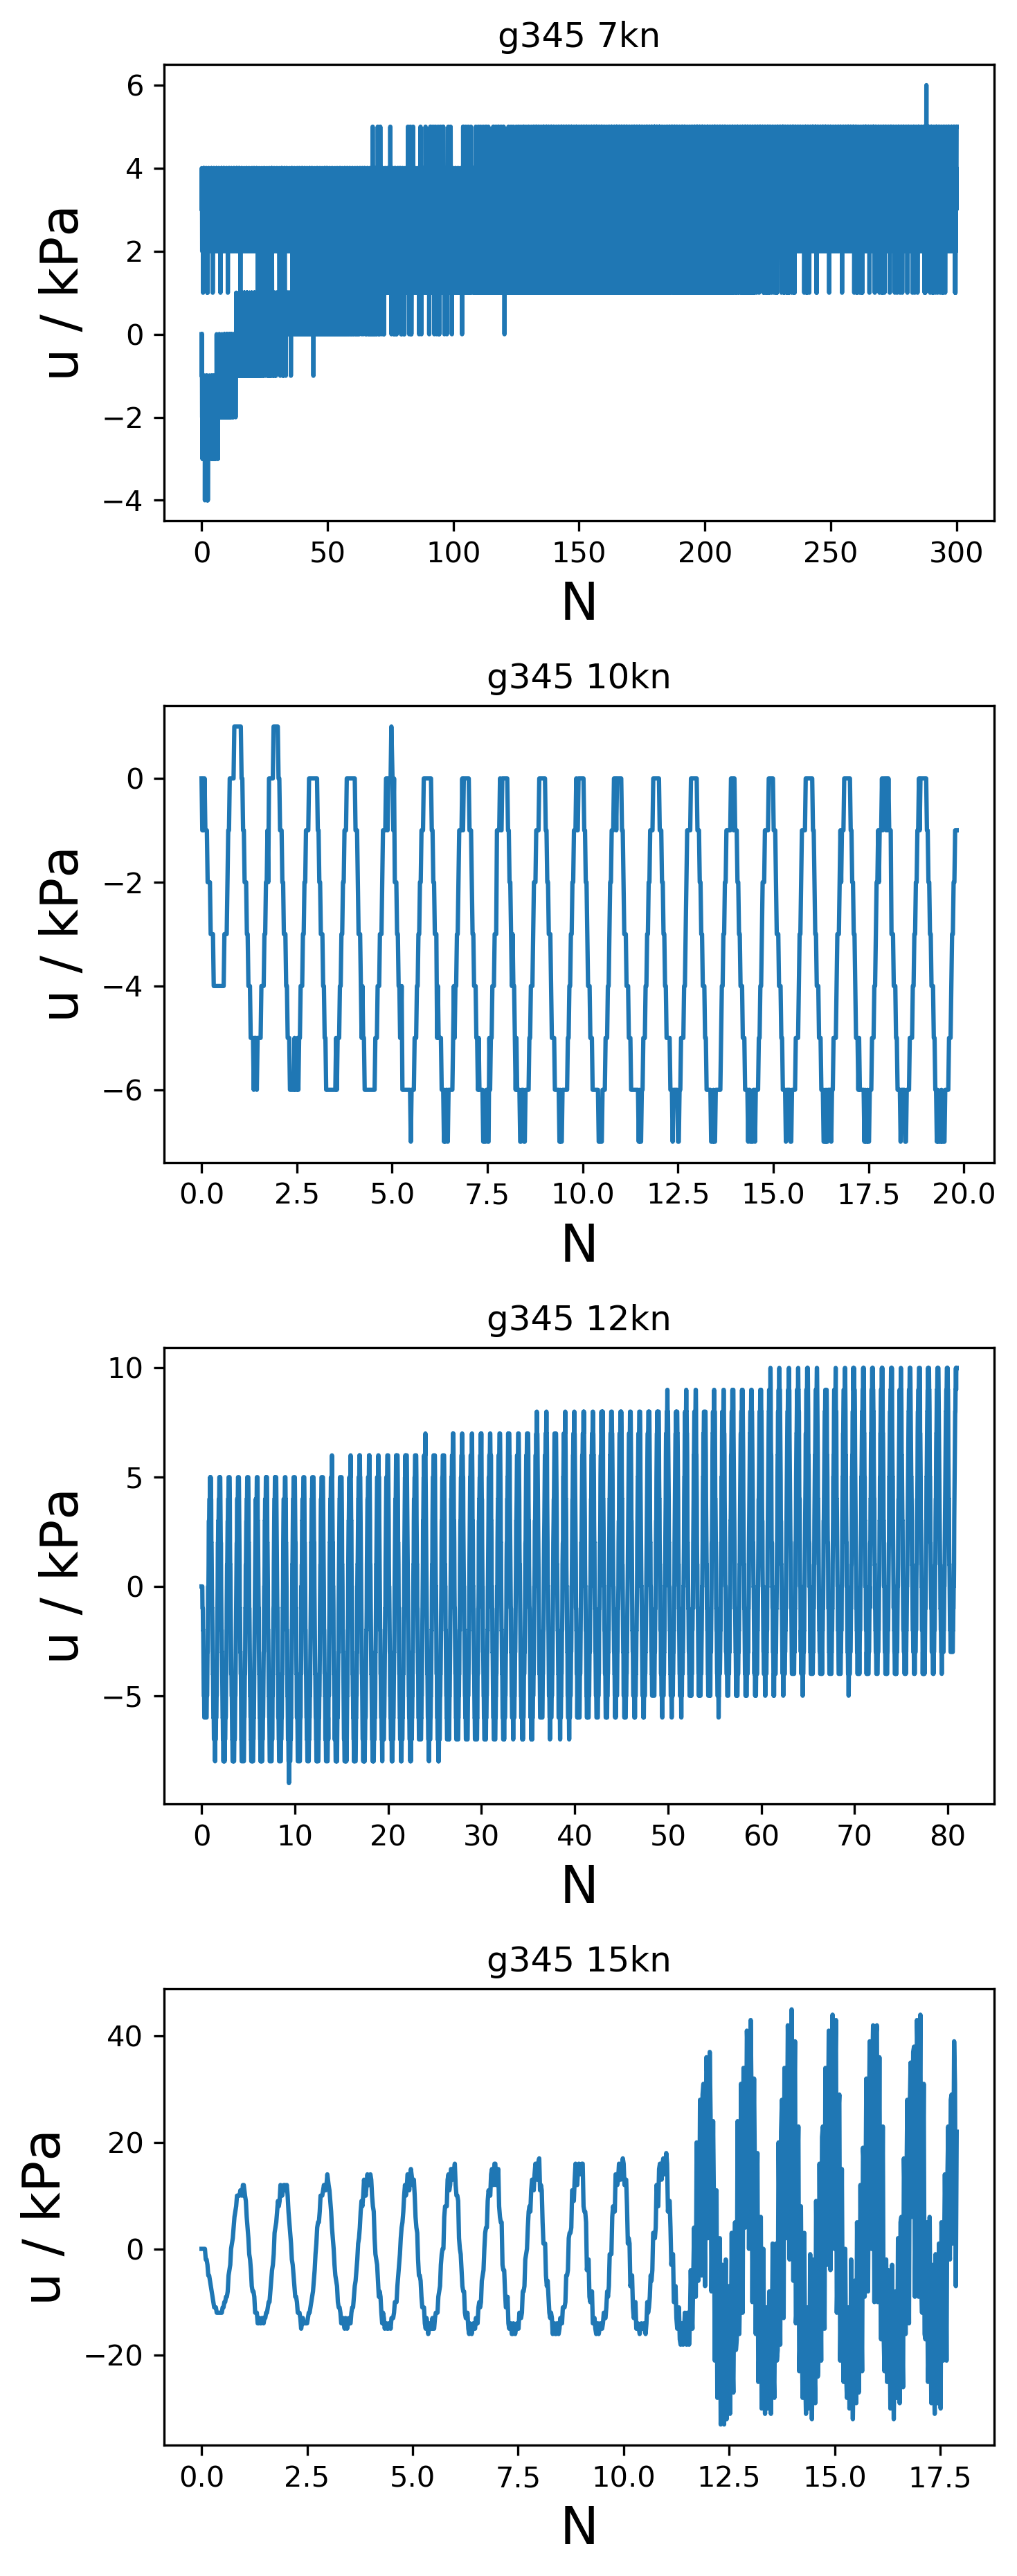

In [11]:
plt.figure(figsize=(5,12.5), dpi=300)
plt.subplot(4, 1, 1)
plotu(df_7kn, 7)
plt.subplot(4, 1, 2)
plotu(df_10kn, 10)
plt.subplot(4, 1, 3)
plotu(df_12kn, 12)
plt.subplot(4, 1, 4)
plotu(df_15kn, 15)
plt.tight_layout()
plt.savefig('g345u.png')